In [1]:
from google.colab import drive
drive.mount('/content/drive')
!pwd

Mounted at /content/drive
/content


In [2]:
!ls
%cd drive/MyDrive/DA/clustering
!pwd

drive  sample_data
/content/drive/.shortcut-targets-by-id/16BzENDslJoHpb3XlZqeoy64RYYEZ8ltp/clustering
/content/drive/.shortcut-targets-by-id/16BzENDslJoHpb3XlZqeoy64RYYEZ8ltp/clustering


In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from math import pi
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
from sklearn import metrics
import collections
from sklearn.preprocessing import StandardScaler, normalize, MinMaxScaler

###Loading pre-processed non-compressed data

In [4]:
df_data_pro = pd.read_csv('processed_football_data.csv', na_values=np.NaN)
print(df_data_pro.shape)
display(df_data_pro.head())
display(df_data_pro.info())
display(df_data_pro.describe())

(18147, 78)


,Age,Overall,Potential,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Body Type,Real Face,Jersey Number,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Attack Work Rate,Defense Work Rate
0,31,94,94,110.5,565.0,2202,0,5.0,4.0,4.0,1,1,10.0,5.7,159,88.0,88.0,88.0,92.0,93.0,93.0,93.0,92.0,93.0,93.0,93.0,91.0,84.0,84.0,84.0,91.0,64.0,61.0,61.0,61.0,64.0,59.0,47.0,47.0,47.0,59.0,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226.5,1,1
1,33,94,94,77.0,405.0,2228,1,5.0,4.0,5.0,1,1,7.0,6.2,183,91.0,91.0,91.0,89.0,90.0,90.0,90.0,89.0,88.0,88.0,88.0,88.0,81.0,81.0,81.0,88.0,65.0,61.0,61.0,61.0,65.0,61.0,53.0,53.0,53.0,61.0,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127.1,2,0
2,26,92,93,118.5,290.0,2143,1,5.0,5.0,5.0,1,1,10.0,5.9,150,84.0,84.0,84.0,89.0,89.0,89.0,89.0,89.0,89.0,89.0,89.0,88.0,81.0,81.0,81.0,88.0,65.0,60.0,60.0,60.0,65.0,60.0,47.0,47.0,47.0,60.0,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228.1,2,1
3,27,91,93,72.0,260.0,1471,1,4.0,3.0,1.0,0,1,1.0,6.4,168,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138.6,1,1
4,27,91,92,102.0,355.0,2281,1,4.0,5.0,4.0,1,1,7.0,5.1,154,82.0,82.0,82.0,87.0,87.0,87.0,87.0,87.0,88.0,88.0,88.0,88.0,87.0,87.0,87.0,88.0,77.0,77.0,77.0,77.0,77.0,73.0,66.0,66.0,66.0,73.0,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196.4,2,2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18147 entries, 0 to 18146
Data columns (total 78 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       18147 non-null  int64  
 1   Overall                   18147 non-null  int64  
 2   Potential                 18147 non-null  int64  
 3   Value                     18147 non-null  float64
 4   Wage                      18147 non-null  float64
 5   Special                   18147 non-null  int64  
 6   Preferred Foot            18147 non-null  int64  
 7   International Reputation  18147 non-null  float64
 8   Weak Foot                 18147 non-null  float64
 9   Skill Moves               18147 non-null  float64
 10  Body Type                 18147 non-null  int64  
 11  Real Face                 18147 non-null  int64  
 12  Jersey Number             18147 non-null  float64
 13  Height                    18147 non-null  float64
 14  Weight

None

,Age,Overall,Potential,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Body Type,Real Face,Jersey Number,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Attack Work Rate,Defense Work Rate
count,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000
mean,25.121122,66.253926,71.324076,264.965851,9.759024,1598.002645,0.768061,1.113297,2.947154,2.361492,0.709484,0.091145,19.546096,5.796225,165.982972,51.363917,51.363917,51.363917,52.449716,52.166970,52.166970,52.166970,52.449716,52.401278,52.401278,52.401278,53.068992,51.724087,51.724087,51.724087,53.068992,51.095443,50.484102,50.484102,50.484102,51.095443,50.467791,49.408663,49.408663,49.408663,50.467791,49.738414,45.550229,52.300766,58.695432,42.912217,55.375158,47.176283,42.866038,52.721386,58.374828,64.612829,64.726236,63.501295,61.839147,63.964292,55.465201,65.091034,63.221579,65.318620,47.113187,55.876068,46.702761,49.962198,53.407781,48.546371,58.651127,47.286053,47.701879,45.666336,16.616906,16.393839,16.233041,16.389651,16.712019,209.288246,1.218218,1.086185
std,4.669796,6.913320,6.132286,289.865229,22.030250,272.882706,0.422082,0.394150,0.660498,0.756274,0.576000,0.287822,15.947765,0.450096,15.593388,20.127113,20.127113,20.127113,20.782694,20.676314,20.676314,20.676314,20.782694,20.720793,20.720793,20.720793,20.723790,20.113570,20.113570,20.113570,20.723790,19.980009,20.253241,20.253241,20.253241,19.980009,20.009639,20.695756,20.695756,20.695756,20.009639,18.364255,19.527445,17.381753,14.696075,17.695900,18.912224,18.396009,17.480034,15.325211,16.685643,14.930320,14.651776,14.768956,9.011056,14.136073,17.235534,11.822327,15.896381,12.552479,19.263142,17.366534,20.697462,19.530469,14.146594,15.703113,11.437138,19.900450,21.663630,21.287961,17.698612,16.909971,16.504103,17.037031,17.957521,293.407285,0.521755,0.502896
min,16.000000,46.000000,48.000000,0.000000,0.000000,731.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,5.100000,110.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2.000000,4.000000,7.000000,4.000000,4.000000,6.000000,3.000000,9.000000,5.000000,12.000000,12.000000,14.000000,21.000000,16.000000,2.000000,15.000000,12.000000,17.000000,3.000000,11.000000,3.000000,2.000000,10.000000,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,21.000000,62.000000,67.000000,4.400000,1.000000,

###Loading pre-processed compressed data

In [5]:
df_data_comp = pd.read_csv('dropped_football_data_with_names.csv', na_values=np.NaN)
df_data_comp = df_data_comp.drop(['Name'],axis=1)
print(df_data_comp.shape)
display(df_data_comp.head())
display(df_data_comp.info())
display(df_data_comp.describe())

(18147, 49)


,Age,Overall,Potential,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Body Type,Real Face,Jersey Number,Height,Weight,LS,LWB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,GKDiving,Release Clause,Attack Work Rate,Defense Work Rate
0,31,94,94,110.5,565.0,2202,0,5.0,4.0,4.0,1,1,10.0,5.7,159,88.0,64.0,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,6.0,226.5,1,1
1,33,94,94,77.0,405.0,2228,1,5.0,4.0,5.0,1,1,7.0,6.2,183,91.0,65.0,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,7.0,127.1,2,0
2,26,92,93,118.5,290.0,2143,1,5.0,5.0,5.0,1,1,10.0,5.9,150,84.0,65.0,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,9.0,228.1,2,1
3,27,91,93,72.0,260.0,1471,1,4.0,3.0,1.0,0,1,1.0,6.4,168,0.0,0.0,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,90.0,138.6,1,1
4,27,91,92,102.0,355.0,2281,1,4.0,5.0,4.0,1,1,7.0,5.1,154,82.0,77.0,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,15.0,196.4,2,2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18147 entries, 0 to 18146
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       18147 non-null  int64  
 1   Overall                   18147 non-null  int64  
 2   Potential                 18147 non-null  int64  
 3   Value                     18147 non-null  float64
 4   Wage                      18147 non-null  float64
 5   Special                   18147 non-null  int64  
 6   Preferred Foot            18147 non-null  int64  
 7   International Reputation  18147 non-null  float64
 8   Weak Foot                 18147 non-null  float64
 9   Skill Moves               18147 non-null  float64
 10  Body Type                 18147 non-null  int64  
 11  Real Face                 18147 non-null  int64  
 12  Jersey Number             18147 non-null  float64
 13  Height                    18147 non-null  float64
 14  Weight

None

,Age,Overall,Potential,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Body Type,Real Face,Jersey Number,Height,Weight,LS,LWB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,GKDiving,Release Clause,Attack Work Rate,Defense Work Rate
count,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000
mean,25.121122,66.253926,71.324076,264.965851,9.759024,1598.002645,0.768061,1.113297,2.947154,2.361492,0.709484,0.091145,19.546096,5.796225,165.982972,51.363917,51.095443,49.738414,45.550229,52.300766,58.695432,42.912217,55.375158,47.176283,42.866038,52.721386,58.374828,64.612829,64.726236,63.501295,61.839147,63.964292,55.465201,65.091034,63.221579,65.318620,47.113187,55.876068,46.702761,49.962198,53.407781,48.546371,58.651127,47.286053,47.701879,16.616906,209.288246,1.218218,1.086185
std,4.669796,6.913320,6.132286,289.865229,22.030250,272.882706,0.422082,0.394150,0.660498,0.756274,0.576000,0.287822,15.947765,0.450096,15.593388,20.127113,19.980009,18.364255,19.527445,17.381753,14.696075,17.695900,18.912224,18.396009,17.480034,15.325211,16.685643,14.930320,14.651776,14.768956,9.011056,14.136073,17.235534,11.822327,15.896381,12.552479,19.263142,17.366534,20.697462,19.530469,14.146594,15.703113,11.437138,19.900450,21.663630,17.698612,293.407285,0.521755,0.502896
min,16.000000,46.000000,48.000000,0.000000,0.000000,731.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,5.100000,110.000000,0.000000,0.000000,5.000000,2.000000,4.000000,7.000000,4.000000,4.000000,6.000000,3.000000,9.000000,5.000000,12.000000,12.000000,14.000000,21.000000,16.000000,2.000000,15.000000,12.000000,17.000000,3.000000,11.000000,3.000000,2.000000,10.000000,5.000000,3.000000,3.000000,2.000000,1.000000,0.000000,0.000000,0.000000
25%,21.000000,62.000000,67.000000,4.400000,1.000000,1457.000000,1.000000,1.000000,3.000000,2.000000,0.000000,0.000000,8.000000,5.100000,154.000000,48.000000,48.000000,38.000000,30.000000,44.000000,54.000000,30.000000,49.000000,34.000000,31.000000,43.000000,54.000000,57.000000,57.000000,55.000000,56.000000,56.000000,45.000000,58.000000,56.000000,58.000000,33.000000,44.000000,26.000000,38.000000,44.000000,39.000000,51.000000,30.000000,27.000000,8.000000,1.800000,1.000000,1.000000
50%,25.000000,66.000000,71.000000,160.000000,3.000000,1635.000000,1.000000,1.000000,3.000000,2.000000,1.000000,0.000000,17.000000,5.900000,165.000000,57.000000,56.000000,54.000000,49.000000,56.000000,62.000000,44.000000,61.000000,48.000000,41.000000,56.000000,63.000000,67.000000,67.000000,66.000000,62.000000,66.000000,59.000000,66.000000,66.000000,67.000000,51.000000,59.000000,52.000000,55.000000,55.000000,49.000000,60.000000,53.000000,55.000000,11.000000,12.600000,1.000000,1.000000
75%,28.000000,71.000000,75.000000,475.000000,9.000000,1787.000000,1.000000,1.000000,3.000000,3.000000,1.000000,0.000000,26.000000,6.100000,176.000000,64.000000,63.000000,64.000000,62.000000,64.000000,68.000000,57.000000,68.000000,62.000000,57.000000,64.000000,69.000000,75.000000,75.000000,74.000000,68.000000,74.000000,68.000000,73.000000,74.000000,74.000000,62.000000,69.000000,64.000000,64.000000,64.000000,60.000000,67.000000,64.000000,66

#DBSCAN on Compressed Data 

###With very small eps value
Leads to no cluster formation due to very small distance value. All points are considered to be noise.

In [ ]:
dbs = DBSCAN(eps=10, min_samples=50).fit(df_data_comp)
core_samples_mask = np.zeros_like(dbs.labels_, dtype=bool)
core_samples_mask[dbs.core_sample_indices_] = True
labels = dbs.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 0
Estimated number of noise points: 18147


###With very large eps value  
Leads to one huge cluster formation due to very large distance value. None or extremely few points are considered to be noise.

In [ ]:
dbs = DBSCAN(eps=200, min_samples=50).fit(df_data_comp)
core_samples_mask = np.zeros_like(dbs.labels_, dtype=bool)
core_samples_mask[dbs.core_sample_indices_] = True
labels = dbs.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 1
Estimated number of noise points: 2


###With appropriate eps and relatively small min_samples values  
Leads to good number of cluster and few noise points.

In [ ]:
dbs = DBSCAN(eps=120, min_samples=50).fit(df_data_comp)
core_samples_mask = np.zeros_like(dbs.labels_, dtype=bool)
core_samples_mask[dbs.core_sample_indices_] = True
labels = dbs.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 4
Estimated number of noise points: 279


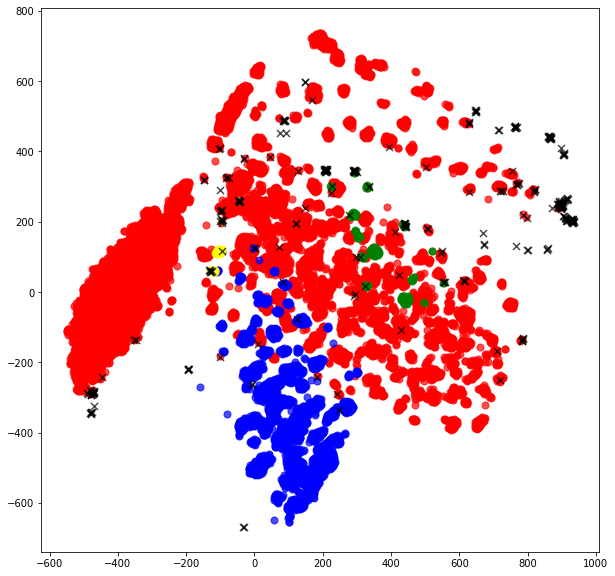

In [ ]:
tsneagg=TSNE(n_components=2, perplexity=50, init='pca', n_iter=1000, random_state=1).fit_transform(df_data_comp.values)
fig=plt.figure(figsize=(10,10))

plt.scatter(tsneagg[labels==0, 0], tsneagg[labels==0, 1], s=50, marker='o', color='red', alpha=0.7)
plt.scatter(tsneagg[labels==1, 0], tsneagg[labels==1, 1], s=50, marker='o', color='blue', alpha=0.7)
plt.scatter(tsneagg[labels==2, 0], tsneagg[labels==2, 1], s=50, marker='o', color='green', alpha=0.7)
plt.scatter(tsneagg[labels==3, 0], tsneagg[labels==3, 1], s=50, marker='o', color='yellow', alpha=0.7)
plt.scatter(tsneagg[labels==-1, 0], tsneagg[labels==-1, 1], s=50, marker='x', color='black', alpha=0.7)
plt.show()

###With appropriate eps and very large min_samples values  
Appropriate distance leads to good number of clusters but very large min_samples requirement leads to too many noise points.

In [ ]:
dbs = DBSCAN(eps=120, min_samples=300).fit(df_data_comp)
core_samples_mask = np.zeros_like(dbs.labels_, dtype=bool)
core_samples_mask[dbs.core_sample_indices_] = True
labels = dbs.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 4
Estimated number of noise points: 4784


###With somewhat higher (than appropriate) eps and min_samples values  
Leads to fewer clusters and fewer noise points.

In [ ]:
dbs = DBSCAN(eps=150, min_samples=100).fit(df_data_comp)
core_samples_mask = np.zeros_like(dbs.labels_, dtype=bool)
core_samples_mask[dbs.core_sample_indices_] = True
labels = dbs.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 3
Estimated number of noise points: 187


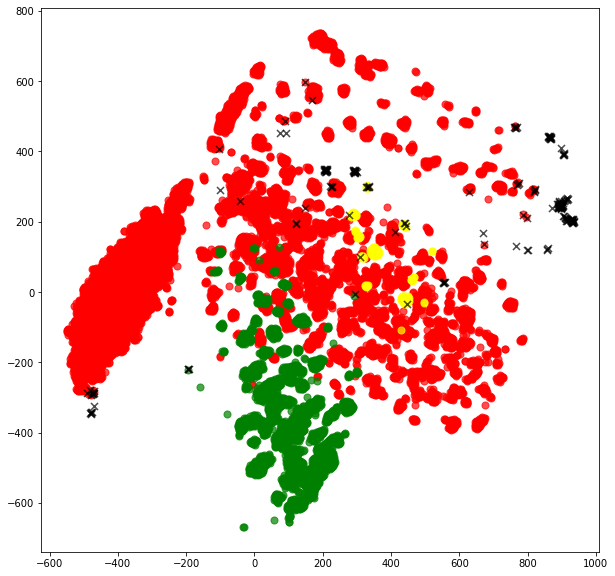

In [ ]:
tsneagg=TSNE(n_components=2, perplexity=50, init='pca', n_iter=1000, random_state=1).fit_transform(df_data_comp.values)
fig=plt.figure(figsize=(10,10))

plt.scatter(tsneagg[labels==0, 0], tsneagg[labels==0, 1], s=50, marker='o', color='red', alpha=0.7)
plt.scatter(tsneagg[labels==1, 0], tsneagg[labels==1, 1], s=50, marker='o', color='green', alpha=0.7)
plt.scatter(tsneagg[labels==2, 0], tsneagg[labels==2, 1], s=50, marker='o', color='yellow', alpha=0.7)
plt.scatter(tsneagg[labels==-1, 0], tsneagg[labels==-1, 1], s=50, marker='x', color='black', alpha=0.7)
plt.show()

#DBSCAN on Non-Compressed Data

In [ ]:
dbs = DBSCAN(eps=150, min_samples=100).fit(df_data_pro.values)
core_samples_mask = np.zeros_like(dbs.labels_, dtype=bool)
core_samples_mask[dbs.core_sample_indices_] = True
labels = dbs.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 4
Estimated number of noise points: 210


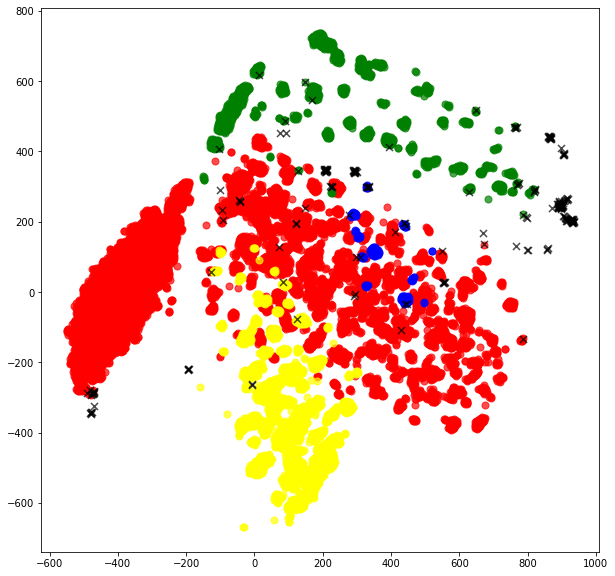

In [ ]:
tsneagg=TSNE(n_components=2, perplexity=50, init='pca', n_iter=1000, random_state=1).fit_transform(df_data_comp.values)
fig=plt.figure(figsize=(10,10))

plt.scatter(tsneagg[labels==0, 0], tsneagg[labels==0, 1], s=50, marker='o', color='red', alpha=0.7)
plt.scatter(tsneagg[labels==1, 0], tsneagg[labels==1, 1], s=50, marker='o', color='green', alpha=0.7)
plt.scatter(tsneagg[labels==2, 0], tsneagg[labels==2, 1], s=50, marker='o', color='yellow', alpha=0.7)
plt.scatter(tsneagg[labels==3, 0], tsneagg[labels==3, 1], s=50, marker='o', color='blue', alpha=0.7)
plt.scatter(tsneagg[labels==-1, 0], tsneagg[labels==-1, 1], s=50, marker='x', color='black', alpha=0.7)
plt.show()

#DBSCAN on Standardized data

In [11]:
scaler = StandardScaler()
data_comp_scale = scaler.fit_transform(df_data_comp.values)
print(data_comp_scale.mean(axis=0),data_comp_scale.std(axis=0))

[-2.50590925e-16 -7.51772774e-17 -2.00472740e-16  8.14420505e-17
 -1.25295462e-17 -3.75886387e-16 -6.57801177e-17 -1.50354555e-16
 -1.81678420e-16  1.75413647e-16 -1.53486941e-16  5.01181849e-17
 -2.50590925e-17 -1.58028902e-15 -1.12765916e-16  0.00000000e+00
 -1.50354555e-16  1.25295462e-16  1.00236370e-16 -1.25295462e-16
  7.51772774e-17  3.75886387e-17 -2.00472740e-16  1.62884101e-16
 -1.75413647e-16  7.51772774e-17  1.62884101e-16 -4.07210252e-16
 -2.50590925e-17  1.12765916e-16 -3.25768202e-16  2.50590925e-17
 -7.51772774e-17  3.57092068e-16  1.50354555e-16 -5.01181849e-16
  1.62884101e-16  1.12765916e-16 -7.51772774e-17 -7.51772774e-17
 -3.75886387e-17 -1.00236370e-16 -3.00709110e-16  6.26477312e-17
  6.26477312e-17  1.56619328e-17 -9.39715967e-17 -1.19030689e-16
  1.25295462e-16] [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1.]


In [ ]:
dbs = DBSCAN(eps=5, min_samples=50).fit(data_comp_scale)
core_samples_mask = np.zeros_like(dbs.labels_, dtype=bool)
core_samples_mask[dbs.core_sample_indices_] = True
labels = dbs.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 2
Estimated number of noise points: 464


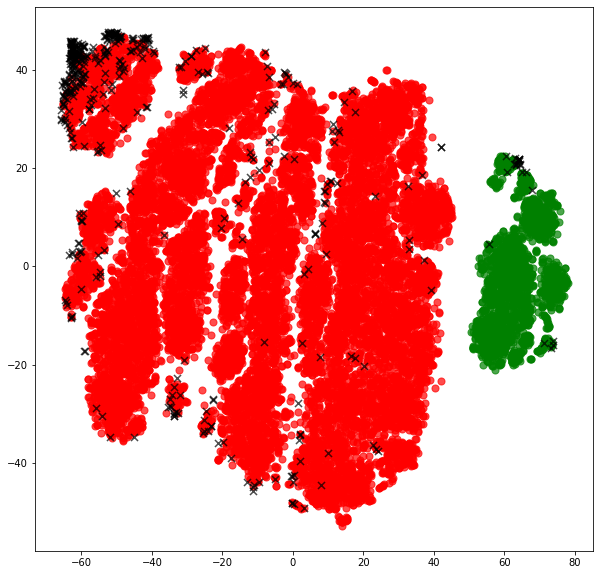

In [ ]:
tsneagg=TSNE(n_components=2, perplexity=50, init='pca', n_iter=1000, random_state=1).fit_transform(data_comp_scale)
fig=plt.figure(figsize=(10,10))

plt.scatter(tsneagg[labels==0, 0], tsneagg[labels==0, 1], s=50, marker='o', color='red', alpha=0.7)
plt.scatter(tsneagg[labels==1, 0], tsneagg[labels==1, 1], s=50, marker='o', color='green', alpha=0.7)
plt.scatter(tsneagg[labels==-1, 0], tsneagg[labels==-1, 1], s=50, marker='x', color='black', alpha=0.7)
plt.show()

##Functions for Analysing Clusters  
1) Quality of clusters : Silhoutte score  (cluster centroids calculated using cluster means)  
2) Detecting outliers : Datapoints having negative silhoutte score  
3) Intracluster distance : Average Complete Diameter  
4) Intercluster distance : Average Linkage Distance  
5) Similar attributes per cluster : Top K attributes having the minimum average difference  
6) Attributes different in outliers : Top K attributes having the maximum average difference  
7) Most discriminative feature between pair of clusters : Max distances between attribute-wise mean (centroids) of the clusters  


In [17]:
def euclid_distance(X1, X2):
    all_dists = -2 * np.dot(X1, X2.T) + np.sum(X2**2, axis=1) + np.sum(X1**2, axis=1)[:, np.newaxis]
    return all_dists

def euclid_vectors(X1, X2):
    all_dists = -2 * np.dot(X1, X2.T) + X2**2 + (X1**2)[:, np.newaxis]
    return all_dists

def silhouette_score(labels,data):
    centroids = []
    clusters = {}
    unq_labels = np.unique(labels)
    for cl in unq_labels:
        if cl==-1:
            continue
        clusters[cl] = data[labels==cl,:]
        centroids.append(np.mean(clusters[cl],axis=0))
    centroids = np.array(centroids)
    center_dists = euclid_distance(centroids,centroids)
    tot_S = []
    # outliers = []
    for c in unq_labels:
        if c==-1:
            continue
        cur_cdists = euclid_distance(clusters[c],clusters[c])
        a = np.sum(cur_cdists,axis=1) / (len(clusters[c])-1)
        nearest_center = np.argmin(np.concatenate((center_dists[c,:c],center_dists[c,c+1:])))
        nearest_cdists = euclid_distance(clusters[c],clusters[nearest_center])
        b = np.sum(nearest_cdists,axis=1) / (len(clusters[nearest_center]))
        s = None
        if len(clusters[nearest_center]) > 1:
            s = (b - a) / np.max(np.stack((a,b),axis=0),axis=0)
        else:
            s = np.array([0])
        # outliers.extend(clusters[c][s<0])
        tot_S.append(s.mean())
    return np.mean(tot_S)

def avg_diameter_dist(labels,data):
    diam = 0
    unq_labels = np.unique(labels)
    for cl in unq_labels:
        if cl==-1:
            continue
        cluster = data[labels==cl,:]
        cur_cdists = euclid_distance(cluster,cluster)
        # print("Points in cluster",cl," : ",cur_cdists.shape[0])
        ad = np.mean(cur_cdists)
        diam += ad
    print("\nAverage Complete Diameter (Intracluster) :",diam//len(unq_labels))

def avg_linkage_dist(labels,data):
    linkage = 0
    unq_labels = np.unique(labels)
    # print(unq_labels)
    for i in range(len(unq_labels)):
        if unq_labels[i]==-1:
            continue
        c1 = data[labels==unq_labels[i],:]
        j = i+1
        while j < len(unq_labels):
            if unq_labels[j]==-1:
                j+=1
                continue
            c2 = data[labels==unq_labels[j],:]
            cur_cdists = euclid_distance(c1,c2)
            ad = np.mean(cur_cdists)
            # print(i,j,ad)
            linkage += ad
            j += 1
        i += 1
    print("\nAverage Linkage Distance (Intercluster) :",linkage//len(unq_labels))

def cluster_diff_by(labels,data,cols,k=1):
    clst_means = []
    all_dists = []
    unq_labels = np.unique(labels)
    for cl in unq_labels:
        if cl==-1:
            continue
        clst_means.append(np.mean(data[labels==cl],axis=0))
    clst_means = np.array(clst_means)
    for i in range(len(clst_means)):
        cur_dist = (clst_means - clst_means[i])**2
        for j in range(i+1,len(cur_dist)):
            indx = np.argmax(cur_dist[j])
            print("\nMost discriminative feature in clusters",i,"&",j,": ",cols[indx])


def similar_attributes(labels,data,cols,k=5):
    std = StandardScaler()
    # data_std = std.fit_transform(data)  ## bring all features to same scale
    for cl in np.unique(labels):
        if cl==-1:
            continue
        mean_dists = []
        cluster = data[labels==cl,:]
        for col in range(len(cols)):
            cur_cdists = euclid_vectors(cluster[:,col],cluster[:,col])
            # print(cur_cdists.shape)
            ad = abs(np.mean(cur_cdists))
            mean_dists.append(ad)
        mean_dists = np.asarray(mean_dists)
        indx = np.argsort(mean_dists)[:k]
        # print(mean_dists[indx])
        # stats = [str(m)+u"\u00B1"+str(s) for m,s in dict(zip(np.mean(data[indx],axis=0),np.std(data[indx],axis=0))).items()]
        # result = dict(zip(list(cols[indx]), stats))
        print("\nTop K similar features in cluster ",cl," : ",list(cols[indx]))
        print("Name of cluster",cl," : ",tuple(cols[indx])[:3])
        

def diff_attrs_outliers(labels,data,cols,k=5):
    # std = StandardScaler()
    # data = std.fit_transform(data)  ## bring all features to same scale
    outliers = data[labels==-1,:]
    mean_dists = []
    for col in range(len(cols)):
        cur_cdists = euclid_vectors(outliers[:,col],outliers[:,col])
        # print(cur_cdists.shape)
        ad = abs(np.mean(cur_cdists))
        mean_dists.append(ad)
    mean_dists = np.asarray(mean_dists)
    indx = np.argsort(mean_dists)[:k]
    print("\nTop K different features in outliers : ",list(cols[indx]))

# def diff_attrs_outliers(labels,data,cols,k=5):
#     std = StandardScaler()
#     data = std.fit_transform(data)  ## bring all features to same scale
#     outliers = data[labels==-1,:]
#     clusters = data[labels!=-1,:]
#     mean_outs = np.mean(outliers,axis=0)
#     mean_cls = np.mean(clusters,axis=0)
#     mean_dists = (mean_cls - mean_outs)**2
#     indx = np.argsort(mean_dists)[:k]
#     print(mean_dists[indx])
#     print("\nTop K different features in outliers : ",list(cols[indx]))

###DBSCAN on Standardized and Compressed Data

In [18]:
dbs = DBSCAN(eps=4.15, min_samples=25).fit(data_comp_scale)
core_samples_mask = np.zeros_like(dbs.labels_, dtype=bool)
core_samples_mask[dbs.core_sample_indices_] = True
labels = dbs.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
counts = collections.Counter(labels)
print(counts)

score = silhouette_score(labels,data_comp_scale)
print("\nSilhouette Score:",score)
avg_diameter_dist(labels,data_comp_scale)
avg_linkage_dist(labels,data_comp_scale)
similar_attributes(labels,data_comp_scale,df_data_comp.columns)
cluster_diff_by(labels,data_comp_scale,df_data_comp.columns)
diff_attrs_outliers(labels,data_comp_scale,df_data_comp.columns)

Estimated number of clusters: 3
Estimated number of noise points: 2773
Counter({1: 13485, -1: 2773, 0: 1844, 2: 45})

Silhouette Score: 0.21400536282847651

Average Complete Diameter (Intracluster) : 31.0

Average Linkage Distance (Intercluster) : 128.0

Top K similar features in cluster  0  :  ['Defense Work Rate', 'Attack Work Rate', 'Wage', 'International Reputation', 'Real Face']
Name of cluster 0  :  ('Defense Work Rate', 'Attack Work Rate', 'Wage')

Top K similar features in cluster  1  :  ['GKDiving', 'Wage', 'LS', 'Real Face', 'International Reputation']
Name of cluster 1  :  ('GKDiving', 'Wage', 'LS')

Top K similar features in cluster  2  :  ['LWB', 'Defense Work Rate', 'GKDiving', 'International Reputation', 'Jersey Number']
Name of cluster 2  :  ('LWB', 'Defense Work Rate', 'GKDiving')

Most discriminative feature in clusters 0 & 1 :  GKDiving

Most discriminative feature in clusters 0 & 2 :  LS

Most discriminative feature in clusters 1 & 2 :  Real Face

Top K different fe

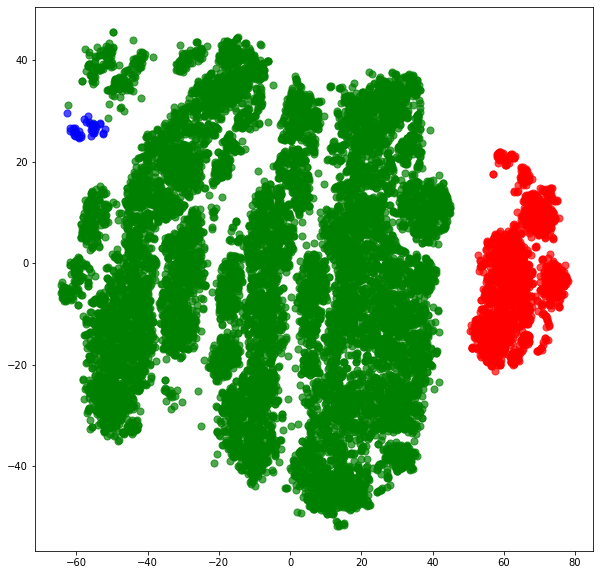

In [ ]:
tsneagg=TSNE(n_components=2, perplexity=50, init='pca', n_iter=1000, random_state=1).fit_transform(data_comp_scale)
fig=plt.figure(figsize=(10,10))

plt.scatter(tsneagg[labels==0, 0], tsneagg[labels==0, 1], s=50, marker='o', color='red', alpha=0.7)
plt.scatter(tsneagg[labels==1, 0], tsneagg[labels==1, 1], s=50, marker='o', color='green', alpha=0.7)
plt.scatter(tsneagg[labels==2, 0], tsneagg[labels==2, 1], s=50, marker='o', color='blue', alpha=0.7)
# plt.scatter(tsneagg[labels==-1, 0], tsneagg[labels==-1, 1], s=50, marker='x', color='black', alpha=0.7)
plt.show()

###DBSCAN on Standardized and Non-compressed Data

In [19]:
scaler = StandardScaler()
data_scale = scaler.fit_transform(df_data_pro.values)
dbs = DBSCAN(eps=4.25, min_samples=25).fit(data_scale)
core_samples_mask = np.zeros_like(dbs.labels_, dtype=bool)
core_samples_mask[dbs.core_sample_indices_] = True
labels = dbs.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
counts = collections.Counter(labels)
print(counts)

score = silhouette_score(labels,data_comp_scale)
print("\nSilhouette Score:",score)
avg_diameter_dist(labels,data_scale)
avg_linkage_dist(labels,data_scale)
similar_attributes(labels,data_scale,df_data_pro.columns)
cluster_diff_by(labels,data_scale,df_data_pro.columns)
diff_attrs_outliers(labels,data_scale,df_data_pro.columns)

Estimated number of clusters: 3
Estimated number of noise points: 2915
Counter({1: 13333, -1: 2915, 0: 1862, 2: 37})

Silhouette Score: 0.22782348830617213

Average Complete Diameter (Intracluster) : 34.0

Average Linkage Distance (Intercluster) : 250.0

Top K similar features in cluster  0  :  ['Defense Work Rate', 'Attack Work Rate', 'Wage', 'Real Face', 'International Reputation']
Name of cluster 0  :  ('Defense Work Rate', 'Attack Work Rate', 'Wage')

Top K similar features in cluster  1  :  ['GKReflexes', 'GKPositioning', 'GKDiving', 'GKHandling', 'GKKicking']
Name of cluster 1  :  ('GKReflexes', 'GKPositioning', 'GKDiving')

Top K similar features in cluster  2  :  ['RS', 'ST', 'LS', 'RF', 'CF']
Name of cluster 2  :  ('RS', 'ST', 'LS')

Most discriminative feature in clusters 0 & 1 :  GKDiving

Most discriminative feature in clusters 0 & 2 :  LCB

Most discriminative feature in clusters 1 & 2 :  Real Face

Top K different features in outliers :  ['GKKicking', 'GKDiving', 'GKHandl

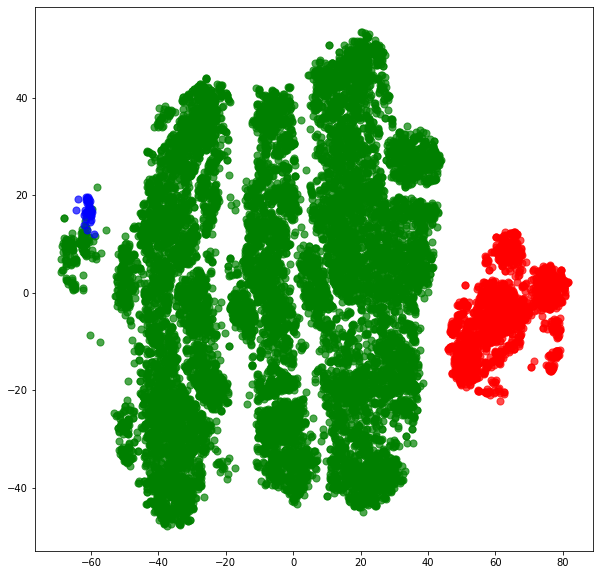

In [ ]:
tsneagg=TSNE(n_components=2, perplexity=50, init='pca', n_iter=1000, random_state=1).fit_transform(data_scale)
fig=plt.figure(figsize=(10,10))

plt.scatter(tsneagg[labels==0, 0], tsneagg[labels==0, 1], s=50, marker='o', color='red', alpha=0.7)
plt.scatter(tsneagg[labels==1, 0], tsneagg[labels==1, 1], s=50, marker='o', color='green', alpha=0.7)
plt.scatter(tsneagg[labels==2, 0], tsneagg[labels==2, 1], s=50, marker='o', color='blue', alpha=0.7)
# plt.scatter(tsneagg[labels==-1, 0], tsneagg[labels==-1, 1], s=50, marker='x', color='black', alpha=0.7)
plt.show()